<a href="https://colab.research.google.com/github/sanghamitrajohri/Basic-DL-and-Computer-Vision-COLAB-/blob/main/Arrow_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [2]:
#train = ImageDataGenerator(rescale = 1/255)
#validation = ImageDataGenerator(rescale = 1/255)


In [25]:
# = train.flow_from_directory('/content/drive/My Drive/ARROWS',
#                                          target_size = (200,200),
#                                          batch_size = 3,
#                                          class_mode = 'categorical')


batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/ARROWS',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['DOWN','LEFT','RIGHT','UP'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_dataset = train_datagen.flow_from_directory('/content/drive/My Drive/ARROWS',
                                               target_size = (200,200),
                                               batch_size = 3,
                                               class_mode = 'categorical')

Found 100 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [26]:
train_generator.class_indices

{'DOWN': 0, 'LEFT': 1, 'RIGHT': 2, 'UP': 3}

In [27]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3], dtype=int32)

In [28]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(4, activation='softmax')
])


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 21, 21, 64)       

In [30]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

total_sample=train_generator.n

n_epochs = 30

In [31]:
#model.fit(train_dataset,
#          steps_per_epoch = 3,
#          epochs=10,
#          verbose=1,
#          validation_data= validation_dataset)

history = model.fit(train_generator,
                    steps_per_epoch = 3,
                    epochs = 10,
                    verbose=1,
                    validation_data = validation_dataset
)

Epoch 1/10
3/3 [==============================] - 18s 6s/step - loss: 1.1860 - acc: 0.2353 - val_loss: 1.0504 - val_acc: 0.4200
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 1.0134 - acc: 0.3824 - val_loss: 1.1548 - val_acc: 0.5300
Epoch 3/10
3/3 [==============================] - 3s 843ms/step - loss: 1.2092 - acc: 0.4265 - val_loss: 1.0340 - val_acc: 0.4200
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 1.0461 - acc: 0.5588 - val_loss: 0.8105 - val_acc: 0.7700
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.7582 - acc: 0.8021 - val_loss: 0.6118 - val_acc: 0.8100
Epoch 6/10
3/3 [==============================] - 3s 851ms/step - loss: 0.7051 - acc: 0.7647 - val_loss: 0.9976 - val_acc: 0.5600
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.8815 - acc: 0.6029 - val_loss: 0.6767 - val_acc: 0.8300
Epoch 8/10
3/3 [==============================] - 3s 1s/step - loss: 0.5759 - acc: 0.8750 - val_loss: 0.

In [36]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/ARROWS/RIGHT/download (6).png', target_size = (200,200))
#test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    print("DOWN")
elif result[0][1] == 1:
    print("LEFT")
elif result[0][2] == 1:
    print("RIGHT")
elif result[0][3] == 1:
    print("UP")


RIGHT


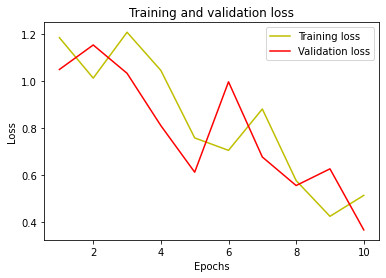

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

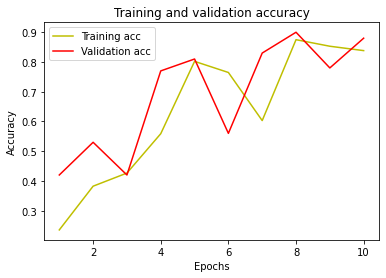

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()